In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.003702301316841264
Fraud Cases: 88
Valid Transactions: 23769


In [8]:
print(data.describe())


               Time            V1            V2            V3            V4  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean   18213.370609     -0.239141      0.198892      0.727022      0.248619   
std    11377.032190      1.894219      1.533073      1.724887      1.440938   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     6624.750000     -0.959528     -0.376134      0.287941     -0.658457   
50%    20564.000000     -0.288644      0.192491      0.874426      0.216440   
75%    29010.250000      1.164867      0.843146      1.505467      1.122367   
max    32954.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean      -0.188428      0.082789     -0.132080      0.022901      0.499391   
std        1.439894      1.328159      1.334691    

In [16]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()



Amount details of the fraudulent transaction


,Amount
count,88.000000
mean,100.010000
std,265.845031
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [15]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,23769.000000
mean,73.880199
std,212.541174
min,0.000000
25%,6.000000
50%,18.110000
75%,65.850000
max,7879.420000


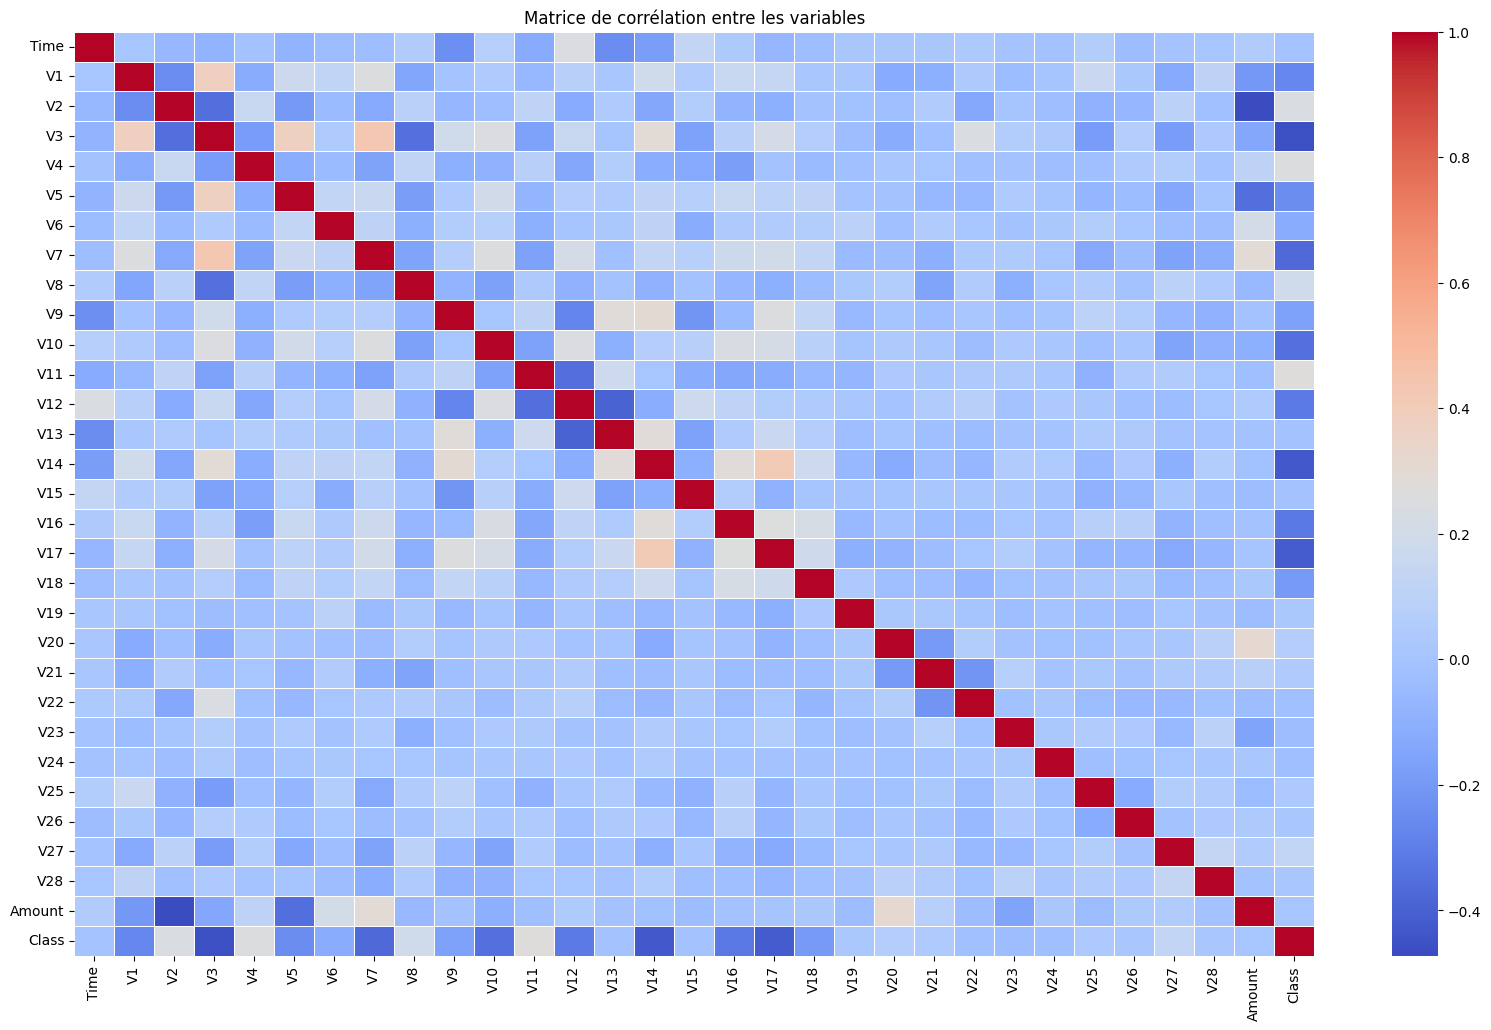

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la corrélation entre les features
corr_matrix = data.corr()

# Affichage de la heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation entre les variables")
plt.show()


In [20]:
# Trier les features selon leur corrélation avec la variable 'Class'
correlations = corr_matrix["Class"].drop("Class").sort_values(key=abs, ascending=False)
print(correlations)


V3       -0.456776
V14      -0.427726
V17      -0.417540
V7       -0.372770
V10      -0.351050
V16      -0.316954
V12      -0.314432
V11       0.274172
V1       -0.269010
V4        0.252654
V5       -0.246737
V2        0.245175
V18      -0.195112
V8        0.191071
V9       -0.166495
V27       0.127914
V6       -0.117733
V20       0.063511
V21       0.042195
V23      -0.036093
V25       0.030539
V19       0.028132
V24      -0.027561
V22      -0.023079
V28       0.021733
V26       0.017809
V15      -0.008227
Amount    0.007445
V13      -0.006833
Time     -0.001481
Name: Class, dtype: float64


In [21]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(23858, 30)
(23858,)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialiser le modèle avec pondération des classes
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entraîner le modèle
rf.fit(xTrain, yTrain)

# Prédire sur le test set
y_pred = rf.predict(xTest)
print("Nombre de NaN dans y_test :", np.isnan(yTest).sum())
import numpy as np

# Indices valides (où y_test n'est pas NaN)
valid_idx = ~np.isnan(yTest)

# Filtrer X_test et y_test
X_test_clean = xTest[valid_idx]
y_test_clean = yTest[valid_idx]

print("Nombre de NaN dans y_test nettoyé :", np.isnan(y_test_clean).sum())
print("Taille de X_test nettoyé :", X_test_clean.shape)
print("Taille de y_test nettoyé :", y_test_clean.shape)

# Prédiction sur données nettoyées
y_pred = rf.predict(X_test_clean)

# Affichage des métriques
from sklearn.metrics import confusion_matrix, classification_report

print("Matrice de confusion :")
print(confusion_matrix(y_test_clean, y_pred))

print("\nClassification report :")
print(classification_report(y_test_clean, y_pred, digits=4))


Nombre de NaN dans y_test : 1
Nombre de NaN dans y_test nettoyé : 0
Taille de X_test nettoyé : (4771, 30)
Taille de y_test nettoyé : (4771,)
Matrice de confusion :
[[4754    0]
 [   1   16]]

Classification report :
              precision    recall  f1-score   support

         0.0     0.9998    1.0000    0.9999      4754
         1.0     1.0000    0.9412    0.9697        17

    accuracy                         0.9998      4771
   macro avg     0.9999    0.9706    0.9848      4771
weighted avg     0.9998    0.9998    0.9998      4771



# Notes explicatives pour le projet Détection de Fraude par Carte Bancaire

---

## 1. Analyse de la distribution des classes

La variable cible "Class" est très déséquilibrée : moins de 0.5% des exemples sont des fraudes.  
Cela rend l'entraînement du modèle plus délicat car un modèle naïf peut facilement prédire toujours "non fraude"  
et obtenir une très bonne accuracy sans réellement détecter les fraudes.

---

## 2. Exploration des relations entre variables

On utilise la corrélation pour détecter quelles variables sont le plus liées à la fraude.  
Les variables avec une forte corrélation absolue sont des candidates intéressantes pour le modèle.  
Cependant, une faible corrélation ne signifie pas forcément qu'une variable est inutile car les relations peuvent être non-linéaires.

---

## 3. Séparation train/test

La séparation train/test est essentielle pour évaluer la capacité du modèle à généraliser sur des données inconnues.  
Ici, on stratifie la séparation pour garder la même proportion de fraudes dans les deux ensembles.  
Cela évite d'avoir un test sans ou avec très peu de fraudes, ce qui fausserait l'évaluation.

---

## 4. Gestion des NaN

La présence de valeurs manquantes (NaN) dans la cible empêche l'évaluation correcte du modèle.  
On nettoie les NaN dans y_test et on filtre aussi X_test pour garder la correspondance.  
Cette étape est critique pour éviter les erreurs et garantir la validité des résultats.

---

## 5. Entraînement avec Random Forest et class_weight

Le paramètre `class_weight='balanced'` permet de pondérer les classes automatiquement  
selon leur fréquence, ce qui aide à gérer le déséquilibre sans générer de données synthétiques.  
Random Forest est un modèle robuste, souvent performant par défaut, adapté aux problèmes comme la détection de fraude.

---

## 6. Interprétation des résultats

La matrice de confusion et le rapport de classification donnent des informations précieuses :  
- **Precision** : sur les alertes de fraude, combien sont réelles (éviter fausses alertes)  
- **Recall** : combien de fraudes ont été détectées (éviter fraudes manquées)  
- **F1-score** : équilibre entre précision et rappel  
- **Accuracy** : peu fiable ici à cause du déséquilibre important

---

## 7. Importance des variables

Visualiser l'importance des variables aide à comprendre quels facteurs influencent le modèle.  
Cela peut aussi guider une éventuelle sélection de features pour simplifier le modèle.

---

## 8. Pourquoi l’accuracy peut induire en erreur ?

Dans un jeu de données très déséquilibré, l'accuracy est un indicateur trompeur.  
Un modèle qui prédit tout en "non fraude" peut avoir une accuracy très élevée  
sans aucune capacité réelle à détecter la fraude.  
C'est pourquoi on préfère les métriques comme le recall, precision, F1-score, ou AUC-ROC.

---

## 9. Courbe ROC et AUC

La courbe ROC permet d’évaluer la capacité du modèle à séparer les classes sur différents seuils.  
L’AUC (Area Under Curve) donne une mesure globale de cette capacité.  
Plus l’AUC est proche de 1, meilleur est le modèle.

---

## 10. Pourquoi ce modèle est facile à utiliser ?

Random Forest avec `class_weight='balanced'` est facile à mettre en œuvre car :  
- Pas besoin de générer des données artificielles (pas de SMOTE)  
- Performant sans tuning complexe  
- Interprétable via l’importance des variables  
- Robuste aux données bruitées et aux outliers

---

